In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Q1

In [2]:
# set OS-independent paths
train_path = os.path.join('HW1_data', '1', 'train_1_5.csv')
test_path = os.path.join('HW1_data', '1', 'test_1_5.csv')
             
# Read the data
train_data = np.genfromtxt(train_path, delimiter=',')
test_data = np.genfromtxt(test_path, delimiter=',')

In [3]:
def init_params():
    theta = np.array([0.0, 0.0])
    offset = 0.0
    return theta, offset


def train_perceptron(theta, offset, train_data, epochs):
    xs = train_data[:, :-1]  # training inputs
    ys = train_data[:, -1]  
    for epoch in range(epochs):
        # print(f'Epoch {epoch}')
        for i, (x, y) in enumerate(zip(xs, ys)):
            # print(f'Example {i}: {x}, {y}', end=' ')
            if y * (theta.dot(x) + offset) <= 0.0:  # wrong prediction
                theta += y*x
                offset += y
                # print('updated weights and offset:', theta, offset)
            # else:
                # print('correct')
    return theta, offset


def test_perceptron(theta, offset, test_data):
    xs = test_data[:, :-1]  # training inputs
    ys = test_data[:, -1]
    test_count = len(test_data)
    # The below line is a vectorized way of checking if y(θx+θo) > 0 for all x and y
    results = ys * (xs.dot(theta) + offset) > 0.0  # returns True/False array
    correct = results.sum()
    return correct / test_count, correct, test_count

Grading:
- -1 each if you didn't report error / reported test error instead of accuracy
- -1 each if learning rate is not 1
- -1 each if you didn't initialize theta and offset to 0 or `random()`.
- -2 each if you updated on correctly classified points (that's in-order stochastic GD).
- -1 each for updating more than once on the same point per epoch
- -1 each if you forgot the offset in predicting y or bracketed it wrongly
- -3 each if you didn't update the offset
- -3 each if you updated theta wrongly
- -1 each for reading inputs wrongly
- -2 each for adding column of 1s (there's offset already)
- -1 each for wrong test accuracy
- -4 if you wrote the training code, but didn't report either 1 epoch or 5 epoch results
- -2 if you reported the wrong epoch
- -3 if your training loop fails (e.g. using csv_reader but not resetting the pointer)
- -5 if you hard-coded the epochs and didn't report one of them
- Half deductions if you have instructions on any of the above but i need to change it for you
- Theta should be updated when the predicted y is 0, but i did not penalize if you didn't as the slides were ambiguous.

## (a) 1 epoch

In [4]:
theta, offset = init_params()
theta, offset = train_perceptron(theta, offset, train_data, epochs=1)
acc, correct, test_count = test_perceptron(theta, offset, test_data)
print(f'Results after 1 epoch:\n'
      f'Theta {theta}, offset {offset}\n'
      f'Test accuracy {acc*100}% ({correct} of {test_count})\n')

Results after 1 epoch:
Theta [-2.4483233  -5.88190688], offset 0.0
Test accuracy 96.7065868263473% (969 of 1002)



## (b) 5 epochs

In [5]:
theta, offset = init_params()
theta, offset = train_perceptron(theta, offset, train_data, epochs=5)
acc, correct, test_count = test_perceptron(theta, offset, test_data)
print(f'Results after 5 epochs:\n'
      f'Theta {theta}, offset {offset}\n'
      f'Test accuracy {acc*100}% ({correct} of {test_count})\n')

Results after 5 epochs:
Theta [-2.05895878 -8.83521606], offset 1.0
Test accuracy 96.7065868263473% (969 of 1002)



# Q2

In [6]:
# set OS-independent paths
x_path = os.path.join('HW1_data', '2', 'hw1x.dat')
y_path = os.path.join('HW1_data', '2', 'hw1y.dat')
             
# Read the data
x1 = np.genfromtxt(x_path)
y = np.genfromtxt(y_path)
n = len(x1)
X = np.c_[np.ones(n), x1]  # c_ combines two 1D arrays into columns of a 2D array
learning_rate = 0.01

def plot_regression(x1, pred_y, y, title=''):
    plt.scatter(x1, y)
    plt.plot(x1, pred_y, 'r')
    plt.title(title)
    plt.show()
    
def calc_half_mse(pred_y, y, n):
    diff = y - pred_y
    return diff.dot(diff) / (2*n)  # allows for vector diff

## (a) Closed form

In [7]:
def closed_form(X, y):
    # You don't need n to solve for theta. Indeed, if the inputs
    # are very small, dividing by n can cause float rounding errors.
    A = X.T.dot(X)
    b = X.T.dot(y)
    # theta = np.linalg.inv(A).dot(b)
    theta = np.linalg.pinv(A).dot(b)  # more accurate inverse
    return theta

Closed Form solution
Theta: [3.2447227  1.78157138]
Training error: 0.5812605752543938


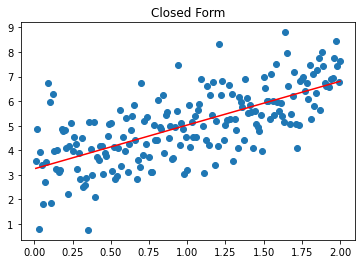

In [8]:
theta = closed_form(X, y)
pred_y = X.dot(theta)
print(f'Closed Form solution\n'
      f'Theta: {theta}\n'
      f'Training error: {calc_half_mse(pred_y, y, n)}')
plot_regression(x1, pred_y, y, title='Closed Form')

Grading:
- -3 if plot is missing
- -1 if only missing `plt.show()` (applies to all subsequent questions that need plotting)
- -2 if theta not reported
- -1 if error is missing / wrongly computed (using MSE instead of half MSE is ok)
- -3 if theta is wrong
- -8 if A and b are not matrices
- -10 if Q2 code doesn't run due to multiple issues (not just 1 typo)

## (b) Gradient descent

Batch Gradient Descent, 5 epochs
After epoch 0:
theta = [0.05035202 0.0565422 ], error = 13.219917694196356
After epoch 1:
theta = [0.09963227 0.11181881], error = 12.677517326806719
After epoch 2:
theta = [0.14786419 0.16585759], error = 12.158610566668758
After epoch 3:
theta = [0.1950707  0.21868571], error = 11.662179145218182
After epoch 4:
theta = [0.24127422 0.27032973], error = 11.18724893007848
Min error: 11.18724893007848


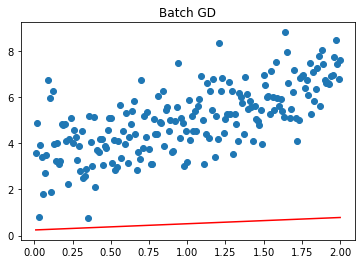

In [9]:
theta = np.zeros(2)
def batch_gd(theta, X, y, n, learning_rate, epochs):
    min_error = float('inf')
    error = 0  # doesn't matter
    for epoch in range(epochs):
        theta += learning_rate / n * (y - X.dot(theta)).dot(X)
        error = calc_half_mse(X.dot(theta), y, n)
        print(f'After epoch {epoch}:\ntheta = {theta}, error = {error}')
        if error < min_error:
            min_error = error
    print(f'Min error: {min_error}')
    return theta, min_error, error

print('Batch Gradient Descent, 5 epochs')
batch_gd(theta, X, y, n, learning_rate, epochs=5)

pred_y = X.dot(theta)
plot_regression(x1, pred_y, y, title='Batch GD')

If you plot the result of the batch GD process, you'll realize that it converges very slowly. With the learning rate of 0.01, you need 1033 epochs before you get within 1% of the closed form error. You can see this if you plot the line after every epoch. This is why we use stochastic GD.

On the flip side, batch GD guarantees the training loss will drop with every update, so you will find the global minimum (given a convex loss function) instead of oscillating near the minimum.

Grading:
- -2 if theta is updated is more than 5 times. Batch GD updates only after each epoch
- -1 if there is a batch size parameter but it's set wrongly (not 200)
- -1 if error is wrongly computed (or computed before theta update)
- -1 if learning rate is wrong (or has another constant factor like n)
- -1 if theta is scalar
- -1 if there is randomness
- -1 if no theta reported
- -2 if you only update on wrong predictions (that's perceptron)
- -1 if theta is not initially 0
- -1 for reading wrong inputs
- If you used MSE instead of half MSE, double gradient is ok
- I did not penalize if you reported the final error instead of minimum error.

## (b) Stochastic gradient descent

Stochastic Gradient Descent, 5 epochs:
Theta [2.9725659 1.8787328]
5 epochs error: 0.5980607220716123
Minimum error: 0.5860681613751991


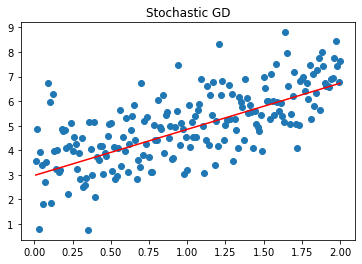

In [10]:
theta = np.zeros(2)
def stochastic_gd(theta, X, y, n, learning_rate, epochs):
    # When drawing with replacement, 1 epoch = n samples
    total_samples = n * epochs
    min_error = float('inf')
    error = 0  # doesn't matter
    for sample in range(total_samples):
        i = random.randrange(0, n)
        theta += learning_rate * (y[i] - X[i].dot(theta)) * X[i]
        # print(theta)
        error = calc_half_mse(X.dot(theta), y, n)
        if min_error > error:
            min_error = error
    print(f'Stochastic Gradient Descent, 5 epochs:\n'
          f'Theta {theta}\n'
          f'5 epochs error: {error}\n'
          f'Minimum error: {min_error}')
    return theta, min_error, error

stochastic_gd(theta, X, y, n, learning_rate, epochs=5)

pred_y = X.dot(theta)
plot_regression(x1, pred_y, y, title='Stochastic GD')


If you plot the result of the stochastic GD process, you'll realize that it converges much faster. But if you track the training loss, it will be unstable; for some outlier points, the loss will increase.

To balance the benefits and downsides of both types of GD, we usually use minibatch GD, updating the points every `s` samples (where `s` could be 32, 64, 128, 256, or anything suited to the dataset / your compute resources).

Grading:
- -2 if theta is not updated 1000 times
- -1 if random sampling is without replacement (i.e. simply shuffling order).
- -1 if no random sampling
- -1 if learning rate is wrong / has another constant factor like n (using 1/(k+1) from the notes is ok)
- -1 if error is wrongly computed (no deduction if you averaged over the epoch)
- -1 if theta is scalar
- -1 if theta is not initially 0
- -1 for reading wrong inputs
- -2 if theta is updated wrongly
- -2 if you only update on wrong predictions (that's perceptron)
- I did not penalize if you reported the final error instead of minimum error.
- Note that your results may vary depending on which training examples were selected.

## (c) Polynomial Regression

Closed Form solution for order 2
Theta: [3.58076915 0.78341361 0.49659591]
Training error: 0.5703016121648224

Closed Form solution for order 3
Theta: [3.52394943 1.11846512 0.08090267 0.13787504]
Training error: 0.570084436469135

Closed Form solution for order 4
Theta: [ 3.85376334 -2.09126966  7.22513464 -5.38187521  1.3730722 ]
Training error: 0.5646163879286425

Closed Form solution for order 5
Theta: [ 3.7181433  -0.1354222   0.48154349  3.53113473 -3.60926334  0.99150956]
Training error: 0.5638968184749199

Closed Form solution for order 6
Theta: [  3.43194652   5.56010883 -27.43134434  58.72902204 -54.95621243
  23.44890141  -3.72427726]
Training error: 0.561343303890296

Closed Form solution for order 7
Theta: [   2.98164474   17.3114661  -104.72227069  270.37448843 -343.19081087
  229.48679623  -77.69331997   10.51443395]
Training error: 0.5562352515819144

Closed Form solution for order 8
Theta: [   2.63575963   28.70144106 -201.17692786  617.80586147 -987.05209112
  893.360

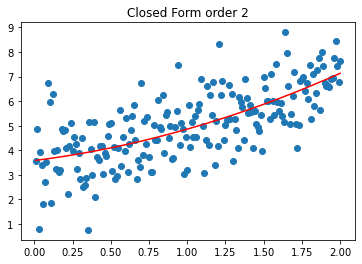

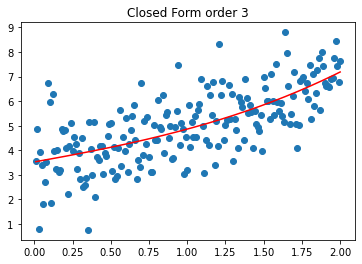

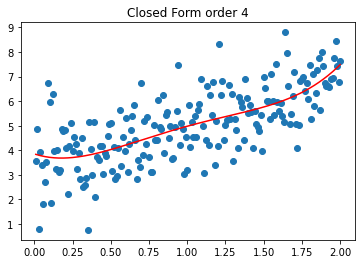

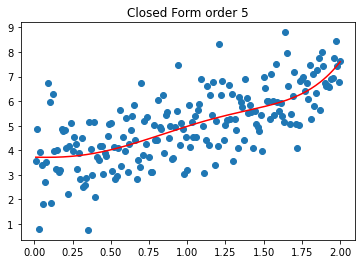

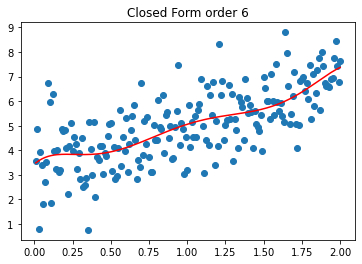

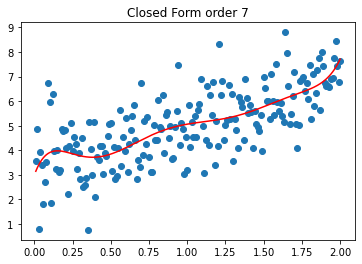

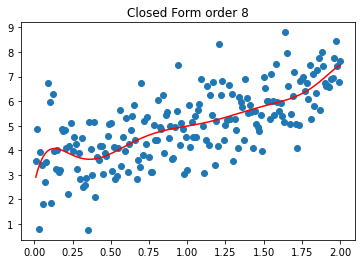

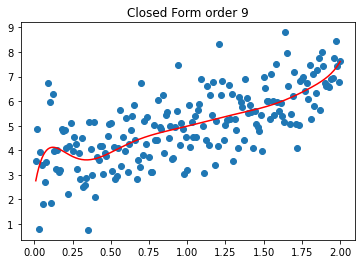

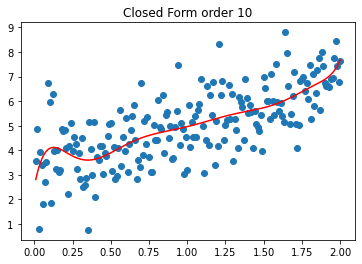

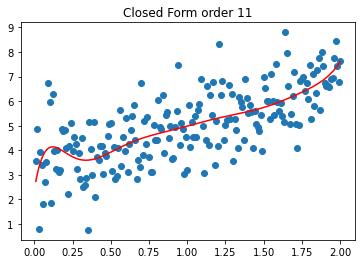

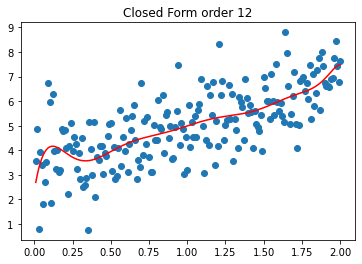

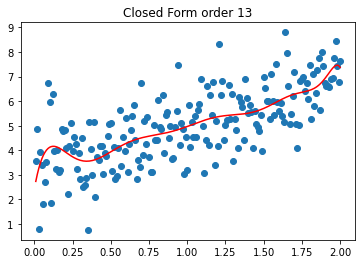

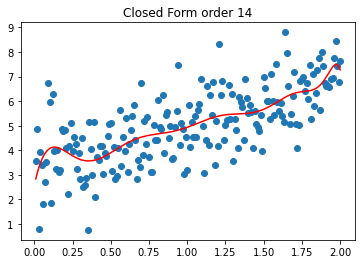

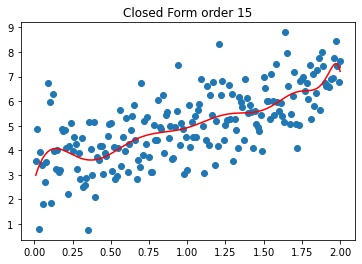

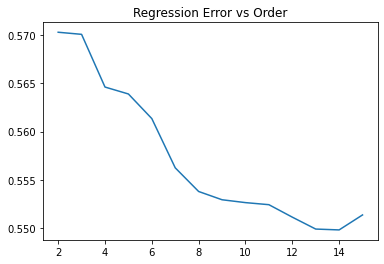

In [11]:
def PolyRegress(x1, y, d):
    errors = []
    X16 = np.ones((n, 16))  # X16 columns are X^0, X^1, X2, ... X^15
    X16[:, 1] = x1
    for order in range(2, d+1):
        X16[:, order] = x1 * X16[:, order-1]
    for order in range(2, d+1):
        X = X16[:, :order+1]
        theta = closed_form(X, y)
        pred_y = X.dot(theta)
        error = calc_half_mse(pred_y, y, len(y))
        errors.append(error)
        print(f'Closed Form solution for order {order}\n'
              f'Theta: {theta}\n'
              f'Training error: {error}\n')
        plot_regression(x1, pred_y, y, title=f'Closed Form order {order}')
    return errors


def plot_errors(d, errors):
    plt.plot(list(range(2, d+1)), errors)
    plt.title('Regression Error vs Order')
    # plt.yscale('log')
    plt.show()
    
d = 15
errors = PolyRegress(x1, y, d)
best_order = errors.index(min(errors)) + 2
print(f'Lowest error occurs at order {best_order} and then increases')
plot_errors(d, errors)

The exact solutions are subject to float precision issues in the matrix inverse at high orders (>9).
If you use `np.linalg.inv()`, you will see a sharp jump in error after order 9 or 10.
The rounding errors can be resolved by using `pinv()` or `solve()` instead of `inv()`.
Answers are marked correct if theta and training error are correct up to 9.

Grading:
- -1 for not reporting/plotting quadratic
- -1 for not reporting training error for quadratic
- -2 for not/wrongly plotting higher orders 
- -1 for only plotting 1 higher order
- -1 for not reporting higher order errors
- -1 for not reporting which order increases error
- -2 for wrong error computation
- -3 for missing out ones column
- -5 for not reporting / plotting anything if the values are correct
- -5 for wrong PolyRegress

# Q3

In [12]:
# set OS-independent paths
x_path = os.path.join('HW1_data', '3', 'hw1_ridge_x.dat')
y_path = os.path.join('HW1_data', '3', 'hw1_ridge_y.dat')
             
# Read the data. Note that x_0 (column of 1s) is at the end.
X = np.genfromtxt(x_path, delimiter=',')
Y = np.genfromtxt(y_path)
val_size = 10
tX = X[val_size:, :]
tY = Y[val_size:]
vX = X[:val_size, :]
vY = Y[:val_size]

## (a)

In [13]:
def ridge_regression(tX, tY, λ):  # use λ as l is confusing
    tn = tX.shape[0]
    I = np.eye(tX.shape[1])
    theta = np.linalg.inv(tn * λ * I + tX.T @ tX) @ tX.T @ tY
    return theta

theta = ridge_regression(tX, tY, λ=0.15)
print(f'Theta for λ = 0.15: {theta}')
# error = calc_half_mse(tX.dot(theta), tY, tX.shape[1]) + theta.dot(theta)/2
# print(f'Error: {error}')


Theta for λ = 0.15: [-0.57939825  1.15033028  0.04934122 -1.59867896]


Grading:
- -4 for not reporting theta
- -4 for correct `ridge_regression` but wrong inputs leading to wrong theta
- -5 for almost correct `ridge_regression`
- -7 for almost correct `ridge_regression` and wrong inputs
- -10 for totally wrong `ridge_regression` or using package

## (b)

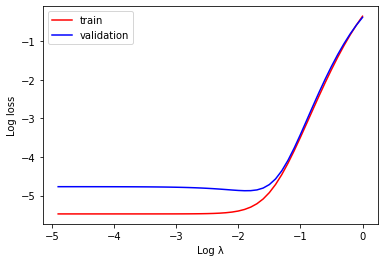

Best validation λ: 10^-1.90 = 0.012589254117941668


In [14]:
tn = tX.shape[0]
vn = vX.shape[0]
tloss = []
vloss = []
index = -np.arange(0, 5, 0.1)
for i in index:
    w = ridge_regression(tX, tY, 10**i)
    tloss.append(((tX.dot(w) - tY) ** 2).sum() / tn / 2)
    vloss.append(((vX.dot(w) - vY) ** 2).sum() / vn / 2)



plt.plot(index, np.log(tloss), 'r', label='train')
plt.plot(index, np.log(vloss), 'b', label='validation')
plt.xlabel('Log λ')
plt.ylabel('Log loss')
plt.legend()
plt.show()

best_logλ = index[vloss.index(min(vloss))]
print(f'Best validation λ: 10^{best_logλ:.2f} = {10**best_logλ}')

Grading:
- -2 for wrong graph
- -2 for no graph output (need to call `plt.show()`)
- -2 for copying code wrongly causing graph to be wrong (e.g. using `tn` for `vn`, forgetting `-` before `np.arange`)
- -2 for copying code wrongly causing λ to be wrong
- -5 for not reporting λ / wrong λ without programmatic checking
- -4 for giving λ for training loss instead of validation
- -1 for forgetting to 10^ to get λ
- -2 for miscounting base for λ (e.g. 1.8 instead of 1.9)
- -2 for getting wrong graph / λ if it can be fixed by fixing `ridge_regression`
- -3 if implementation is correct but wrong inputs from part (a)
- -2 if Y is a 2-D array causing X.dot(w) - Y to be broadcast and summed wrongly

# Q4

In [5]:
img_path = os.path.join('HW1_data', '4', 'kmeans-image.txt')
pixels = np.genfromtxt(img_path)

# to visualize the image
def display(pixels):
    plt.imshow(np.rint(pixels.reshape((516, 407, 3))).astype('uint8'))
    plt.show()

In [ ]:
# distances is a pixels x centroids matrix where distances[i, j]
# is the Euclidean distance from pixel i to centroid j
# it is faster to calculate everything then take argmin/min
def calc_assignments(pixels, centroids):
    distances = np.empty((len(pixels), len(centroids)))
    for cluster, centroid in enumerate(centroids):
        distances[:, cluster] = np.linalg.norm(pixels-centroid, axis=1)
    assignments = distances.argmin(axis=1)  # 1-d array of 0 to 7
    min_distances = distances.min(axis=1)
    return assignments, min_distances


# subbed_pixels is what you get after replacing pixels with nearest centroid
# There's no need to sub the pixels until the end, but it helps to visualize the iterations
# and make sure you're doing it correctly from the start
def calc_centroids(pixels, centroids, assignments, rounding):
    new_centroids = centroids.copy()
    subbed_pixels = np.empty(pixels.shape)  
    for cluster, centroid in enumerate(centroids):
        mask = (assignments == cluster)  # select the pixels that are in this cluster
        subbed_pixels[mask, :] = centroid
        pixels_in_cluster = len(pixels[mask])
        print(f'Cluster {cluster}: {pixels_in_cluster} pixels')
        # select the pixels in the cluster, then take mean for new centroid
        if pixels_in_cluster:
            new_centroids[cluster] = pixels[assignments == cluster].mean(axis=0)
        # if this cluster has no points, do not change the centroid 
    if rounding:
        new_centroids = np.int(new_centroids)
    return new_centroids, subbed_pixels


def run_kmeans(pixels, centroids, rounding=False):  # centroids should be Kx3 numpy array for convenience
    subbed_pixels = pixels
    if rounding:
        centroids = np.rint(centroids)
    old_centroids = 0  # doesn't matter
    iteration = 0
    # you may also stop by comparing assignments, or if rounding=True, compare integer centroids only
    while not np.array_equal(old_centroids, centroids):
        old_centroids = centroids
        print(f'Iteration {iteration}')
        assignments, min_distances = calc_assignments(pixels, centroids)
        error = min_distances.sum()
        print(f'Error: {error}')
        centroids, subbed_pixels = calc_centroids(pixels, centroids, assignments, rounding)
        print(f'New centroids:\n{centroids}\n')
        iteration += 1
        # display(subbed_pixels)
    return centroids, subbed_pixels

Initial image


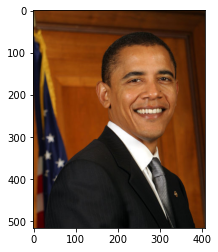

In [17]:
print('Initial image')
display(pixels)

Iteration 0
Error: 14442779.2636604
Cluster 0: 7841 pixels
Cluster 1: 8037 pixels
Cluster 2: 109941 pixels
Cluster 3: 0 pixels
Cluster 4: 176 pixels
Cluster 5: 0 pixels
Cluster 6: 895 pixels
Cluster 7: 83122 pixels
New centroids:
[[226.2480551  208.85269736 194.33031501]
 [203.59562026 135.48836631  77.5030484 ]
 [127.34619478  64.4117936   21.9861835 ]
 [  0.         255.           0.        ]
 [ 92.93181818  94.45454545  89.30113636]
 [  0.           0.         255.        ]
 [ 56.16536313  56.91284916  79.27039106]
 [ 29.20886167  23.7493684   22.21048579]]

Iteration 1
Error: 5799305.161206045
Cluster 0: 5491 pixels
Cluster 1: 21678 pixels
Cluster 2: 82000 pixels
Cluster 3: 0 pixels
Cluster 4: 3863 pixels
Cluster 5: 0 pixels
Cluster 6: 2617 pixels
Cluster 7: 94363 pixels
New centroids:
[[235.90366054 231.99927154 226.03988345]
 [189.74227327 125.89648492  74.8227235 ]
 [129.9375122   61.3082561   14.90686585]
 [  0.         255.           0.        ]
 [114.89179394 102.59228579  93

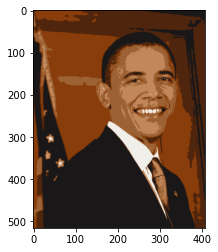

In [18]:
centroids = np.array([[255,255,255], [255,0,0], [128,0,0], [0,255,0],
                      [0,128,0], [0,0,255], [0,0,128], [0,0,0]]).astype(float)
rounding = False  # True will make the centroids become ints after each iteration
centroids, subbed_pixels = run_kmeans(pixels, centroids, rounding)
print('Final image')
display(subbed_pixels)


The interesting thing is that some submissions got up to 20% less error while making mistakes in the k-means, usually by accidentally perturbing the two centroids that were not supposed to have any pixels clustered with it. This shows how important the initialization is, because once the two centroids become "useless", we are effectively running with K = 6.
Some people reset the centroids to (0,0,0) or randomly reinitialized them.

Submissions where centroids are rounded off at each iteration are accepted, but not recommended.
Most submissions ran very slowly due to loops instead of using numpy vectorized functions, but i didn't penalize on speed.
The solution code is almost instantaneous -- the slow part is printing.

Note that the stopping criterion should be when the clusters / centroids don't change.
Using loss for the stopping criterion only works if you use squared Euclidean distance.
Using Euclidean distance only, the loss may actually increase between iterations.

In this implementation, if a pixel is equally distant to two centroids, it is assigned to the one with smaller k.
A more "correct" way is to include the pixel in both clusters. An even more correct way is to use soft clustering... which is GMM.

Grading:
- -1 for not showing image
- -2 for not iterating till convergence / stopping prematurely
- -2 for resetting centroids / not using given initial centroids
- -2 for not printing error
- -4 for increasing error
- -2 for not printing centroids
- -1 for nan or inf centroids (should keep them as-is)
- -3 for correct centroids but wrong image
- -3 if you sampled to make the algorithm faster
- -2 if you gave me the training code but didn't run it / only gave final centroids
- -2 if centroids are slightly off (i check the reason: ok if it's due to different tiebreak methods for nearest centroid), not ok if the classification is wrong. Tolerance should be <2)
- -1 for stopping on increasing loss when using Euclidean distance for loss
- No penalty for computing loss differently if final centroids are correct. Here i used Euclidean distance, but you can also use distance-squared or divide by number of points.
- Other marks deducted depending on how much work it takes to clean your code.